<a href="https://colab.research.google.com/github/ShanRinna/DL3/blob/main/Titanic_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
#load data for PC(sometimes need to use "/")
df = pd.read_csv('/content/Titanic_asignment_group3.csv')
#load data for colab
#df = pd.read_csv('')
df


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,male,49.0,0,0,26.0000,S,no
1,1,male,47.0,0,0,38.5000,S,no
2,3,male,24.0,0,0,7.1417,S,yes
3,3,male,NaN,0,0,8.0500,S,no
4,3,male,28.0,0,0,8.0500,S,yes
...,...,...,...,...,...,...,...,...
1166,1,female,33.0,0,0,27.7208,C,no
1167,2,male,NaN,0,0,0.0000,S,no
1168,1,female,50.0,0,1,247.5208,C,yes
1169,1,male,NaN,0,0,221.7792,S,no


# 1. Quick overview to get a grasp of the data set

key function: pd.info(); pd.astype(); describe(); pd.value_counts()

In [ ]:
# 1.1 Easiest way to check data type and if there are any missing value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1171 entries, 0 to 1170
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1171 non-null   int64  
 1   Sex       1171 non-null   object 
 2   Age       894 non-null    float64
 3   SibSp     1171 non-null   int64  
 4   Parch     1171 non-null   int64  
 5   Fare      1170 non-null   float64
 6   Embarked  1171 non-null   object 
 7   Survived  1171 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 73.3+ KB


In [ ]:
# 1.2 When using the describe function in default, pandas automatically selects the numerical columns
df.describe()

,Pclass,Age,SibSp,Parch,Fare
count,1171.000000,894.000000,1171.000000,1171.000000,1170.000000
mean,2.296328,29.772931,0.495303,0.395389,33.318457
std,0.835215,13.777341,1.014731,0.891525,52.795374
min,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.275000
max,3.000000,70.000000,8.000000,9.000000,512.329200


Note: Pclass is categorical data with dummies, so converting to correct data type is required

In [ ]:
# Change data type
df[['Pclass']]=df[['Pclass']].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1171 entries, 0 to 1170
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1171 non-null   object 
 1   Sex       1171 non-null   object 
 2   Age       894 non-null    float64
 3   SibSp     1171 non-null   int64  
 4   Parch     1171 non-null   int64  
 5   Fare      1170 non-null   float64
 6   Embarked  1171 non-null   object 
 7   Survived  1171 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 73.3+ KB


In [ ]:
# 1.2 Show the correct descriptive statistics
df.describe()

,Age,SibSp,Parch,Fare
count,894.000000,1171.000000,1171.000000,1170.000000
mean,29.772931,0.495303,0.395389,33.318457
std,13.777341,1.014731,0.891525,52.795374
min,1.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,14.454200
75%,39.000000,1.000000,0.000000,31.275000
max,70.000000,8.000000,9.000000,512.329200


In [ ]:
# 1.3 Add include='all' to select all columns
df.describe(include='all')

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
count,1171,1171,894.000000,1171.000000,1171.000000,1170.000000,1171,1171
unique,3,2,NaN,NaN,NaN,NaN,3,2
top,3,male,NaN,NaN,NaN,NaN,S,no
freq,633,755,NaN,NaN,NaN,NaN,810,731
mean,NaN,NaN,29.772931,0.495303,0.395389,33.318457,NaN,NaN
std,NaN,NaN,13.777341,1.014731,0.891525,52.795374,NaN,NaN
min,NaN,NaN,1.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,21.000000,0.000000,0.000000,7.895800,NaN,NaN
50%,NaN,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN
75%,NaN,NaN,39.000000,1.000000,0.000000,31.275000,NaN,NaN


In [ ]:
# 1.4 Using value_counts function to count frequency in categorical column
print(df[['Pclass']].value_counts(sort=True))
print('+-----------------------+')
print(df[['Sex']].value_counts(sort=True))
print('+-----------------------+')
print(df[['Embarked']].value_counts(sort=True))
print('+-----------------------+')
print(df[['Survived']].value_counts(sort=True))

Pclass
3         633
1         286
2         252
dtype: int64
+-----------------------+
Sex   
male      755
female    416
dtype: int64
+-----------------------+
Embarked
S           810
C           249
Q           112
dtype: int64
+-----------------------+
Survived
no          731
yes         440
dtype: int64


In [ ]:
# Tips: row,column
df[['Age','SibSp','Parch','Fare']].describe()
#df.loc[:,['Age','SibSp','Parch','Fare']].describe()
#df.iloc[:,[2,3,4,5]].describe()

,Age,SibSp,Parch,Fare
count,894.000000,1171.000000,1171.000000,1170.000000
mean,29.772931,0.495303,0.395389,33.318457
std,13.777341,1.014731,0.891525,52.795374
min,1.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,14.454200
75%,39.000000,1.000000,0.000000,31.275000
max,70.000000,8.000000,9.000000,512.329200


# 2. Data preprocessing

key function: pd.dropma() unique(); LabelEncoder(); pd.get_dummies

In [ ]:
# 2.1 Deal with missing value by dropping it
new_df=df.dropna(axis=0, how='any')
new_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,male,49.0,0,0,26.0000,S,no
1,1,male,47.0,0,0,38.5000,S,no
2,3,male,24.0,0,0,7.1417,S,yes
4,3,male,28.0,0,0,8.0500,S,yes
5,2,female,7.0,0,2,26.2500,S,yes
...,...,...,...,...,...,...,...,...
1162,3,male,17.0,0,0,7.1250,S,no
1164,3,male,24.0,0,0,7.2500,Q,yes
1165,3,male,40.0,1,4,27.9000,S,no
1166,1,female,33.0,0,0,27.7208,C,no


In [ ]:
# Recheck the descriptive statistics
new_df[['Age','SibSp','Parch','Fare']].describe()

,Age,SibSp,Parch,Fare
count,894.000000,894.000000,894.000000,894.000000
mean,29.772931,0.516779,0.430649,37.663063
std,13.777341,0.923289,0.869542,57.799309
min,1.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,0.000000,8.050000
50%,28.000000,0.000000,0.000000,15.950000
75%,39.000000,1.000000,1.000000,37.004200
max,70.000000,5.000000,6.000000,512.329200


In [ ]:
# Recheck the descriptive statistics
print(new_df[['Pclass']].value_counts(sort=True))
print('+-----------------------+')
print(new_df[['Sex']].value_counts(sort=True))
print('+-----------------------+')
print(new_df[['Embarked']].value_counts(sort=True))
print('+-----------------------+')
print(new_df[['Survived']].value_counts(sort=True))

Pclass
3         416
1         248
2         230
dtype: int64
+-----------------------+
Sex   
male      555
female    339
dtype: int64
+-----------------------+
Embarked
S           671
C           182
Q            41
dtype: int64
+-----------------------+
Survived
no          539
yes         355
dtype: int64


In [ ]:
# 2.2 Using unique function to check category label
print('Pclass',new_df['Pclass'].unique())
print('Sex',new_df['Sex'].unique())
print('Embarked',new_df['Embarked'].unique())
print('Survived',new_df['Survived'].unique())

Pclass ['1' '3' '2']
Sex ['male' 'female']
Embarked ['S' 'C' 'Q']
Survived ['no' 'yes']


In [ ]:
#2.3 Using pd.get_dummies function to generate dummies
dummied_new_df=pd.get_dummies(new_df,columns=['Pclass','Sex','Embarked','Survived'])
dummied_new_df

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Survived_no,Survived_yes
0,49.0,0,0,26.0000,1,0,0,0,1,0,0,1,1,0
1,47.0,0,0,38.5000,1,0,0,0,1,0,0,1,1,0
2,24.0,0,0,7.1417,0,0,1,0,1,0,0,1,0,1
4,28.0,0,0,8.0500,0,0,1,0,1,0,0,1,0,1
5,7.0,0,2,26.2500,0,1,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1162,17.0,0,0,7.1250,0,0,1,0,1,0,0,1,1,0
1164,24.0,0,0,7.2500,0,0,1,0,1,0,1,0,0,1
1165,40.0,1,4,27.9000,0,0,1,0,1,0,0,1,1,0
1166,33.0,0,0,27.7208,1,0,0,1,0,1,0,0,1,0


Note: get_dummies function generates the onehotencode style dummies

In [ ]:
# Export to CSV file Note: preset folder path is required
dummied_new_df.to_csv('C:\ML\SVM\Titanic_demo_deleteNA.csv',index=False, header=True)

print('Export complete...')

Export complete...


# Addition tips for data preprocessing

Sometimes deleting all missing value is not the only optimal option during data preprocessing, so this section provides two additional tips for dealing with missing value. 1. Find the specific data point in a column  2. Fill the missing value

In [ ]:
# Tips: Find the specific data point using np.isnan function
# Find missing value with numpy: row index
np.where(np.isnan(df['Fare']))

(array([152]),)

In [ ]:
# Call the specific data point via row index
df.loc[1043,:]

Pclass           1
Sex         female
Age           33.0
SibSp            0
Parch            0
Fare        151.55
Embarked         S
Survived       yes
Name: 1043, dtype: object

In [ ]:
# Drop via row index
Tip_df=df.drop([1043])
np.where(np.isnan(Tip_df['Fare']))

(array([152]),)

In [ ]:
Tip_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1170 entries, 0 to 1170
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1170 non-null   object 
 1   Sex       1170 non-null   object 
 2   Age       893 non-null    float64
 3   SibSp     1170 non-null   int64  
 4   Parch     1170 non-null   int64  
 5   Fare      1169 non-null   float64
 6   Embarked  1170 non-null   object 
 7   Survived  1170 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 82.3+ KB


In [ ]:
# Tips: Deal with missing value by filling it
Tip_df=Tip_df.fillna({'Age':round(Tip_df['Age'].mean(),0)})
Tip_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1170 entries, 0 to 1170
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1170 non-null   object 
 1   Sex       1170 non-null   object 
 2   Age       1170 non-null   float64
 3   SibSp     1170 non-null   int64  
 4   Parch     1170 non-null   int64  
 5   Fare      1169 non-null   float64
 6   Embarked  1170 non-null   object 
 7   Survived  1170 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 82.3+ KB


# 3. Data scaling with minimax technique

Key function: MinMaxScaler()

In [ ]:
# get Min
qMin=np.quantile(new_df.iloc[:,2], 0)
# Calculate Q1
q1 = np.quantile(new_df.iloc[:,2], 0.25)
# Calculate Q2
q2 = np.quantile(new_df.iloc[:,2], 0.5)
# Calculate Q3
q3 = np.quantile(new_df.iloc[:,2], 0.75)
# get Max
qMax=np.quantile(new_df.iloc[:,2], 1)
# Calculate IQR
iqr = q3-q1
# Calculate upper and lower whiskers
upper = q3+(1.5*iqr) #直接在EXCEL刪除66.0
lower = q1-(1.5*iqr)
print('Min:',qMin,', Q1:',q1,', Q2:',q2,', Q3:',q3,', Max:',qMax)
print('IQR:',iqr,'Upper:',upper,'Lower:',lower)
''' Removing the Outliers '''
#minimax scaling
MMscaler=MinMaxScaler(feature_range=(0, 1))
scaling=MMscaler.fit_transform(dummied_new_df)
scaled_data=pd.DataFrame(data=scaling)
scaled_data.columns=dummied_new_df.columns
#scaled_data.columns=['Age','SibsSp','Parch','Fare','Pclass_1','Pclass_2','Pclass_3','Sex_female','Sex_male','Embarked_C','Embarked_Q','Embarked_S','Survived_no','Survived_yes']
scaled_data.head()

Min: 1.0 , Q1: 21.0 , Q2: 28.0 , Q3: 39.0 , Max: 70.0
IQR: 18.0 Upper: 66.0 Lower: -6.0


,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Survived_no,Survived_yes
0,0.695652,0.0,0.000000,0.050749,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,0.666667,0.0,0.000000,0.075147,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,0.333333,0.0,0.000000,0.013940,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,0.391304,0.0,0.000000,0.015713,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,0.086957,0.0,0.333333,0.051237,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


# 4. Set dependent variable(Y or target) & independent variable(X)

In [ ]:
#set x (make prediction) with minimax
scaled_x=scaled_data.drop(['Survived_no','Survived_yes'],axis=1).copy()

#set y (want to predict)
scaled_y=scaled_data['Survived_yes'].copy()
scaled_y=scaled_y.astype(int)

Note: Transforming target to integer datatype is optional

Note: Survived is the target variable(Y), after onehotencoding, survived has divided into two columns; the model only need one target variable, since the target of this demo is binary, so either choosing 'survived_no' or 'survived_yes' will have the same outcome. Thus this demo chooses 'suvived_yes' as the target, because 'yes' is usually labeled with 1.  

# 5. Spilt the data into training & testing set

key function: train_test_split()

key parameters for train_test_spilt(): test_size; random_state

In [ ]:
#prepare dataset with scaling
#Split the data (split into 80% training data & 20% testing data) (lock seed)
scaled_x_train,scaled_x_test,scaled_y_train,scaled_y_test=train_test_split(scaled_x,scaled_y,test_size=0.2,random_state=4)

In [ ]:
from collections import Counter
print('scaled_y_train:',Counter(scaled_y_train))
print('------------------------------------')
print('scaled_y_test :',Counter(scaled_y_test))

scaled_y_train: Counter({0: 429, 1: 286})
------------------------------------
scaled_y_test : Counter({0: 110, 1: 69})


# 6. Fit the model

key function: LinearSVC(); accuracy_score(); precision_score(); f1_score(); sensitivity_score(); specificity_score(); confusion_matrix(); cross_val_score()

In [ ]:
# 6.1 Fit the model with LinearSVC
model=LinearSVC(C=1.0,dual=False,random_state=4)
model.fit(scaled_x_train,scaled_y_train)

LinearSVC(dual=False, random_state=4)

In [ ]:
# 6.2 Show result: out-of-sample testing
# Training result
training_prediction=model.predict(scaled_x_train)
# Accuracy
training_acc=accuracy_score(scaled_y_train,training_prediction)
# f1 score
training_f1s=f1_score(scaled_y_train,training_prediction,pos_label=1)
# precision
training_pre=precision_score(scaled_y_train,training_prediction,pos_label=1)
#sensitivity
training_sen=sensitivity_score(scaled_y_train,training_prediction,pos_label=1)
#specificity
training_spe=specificity_score(scaled_y_train,training_prediction,pos_label=1)
#confusion matrix
training_cm=confusion_matrix(scaled_y_train,training_prediction)

# Testing result
testing_prediction=model.predict(scaled_x_test)
testing_acc=accuracy_score(scaled_y_test,testing_prediction)
testing_f1s=f1_score(scaled_y_test,testing_prediction,pos_label=1)
testing_pre=precision_score(scaled_y_test,testing_prediction,pos_label=1)
testing_sen=sensitivity_score(scaled_y_test,testing_prediction,pos_label=1)
testing_spe=specificity_score(scaled_y_test,testing_prediction,pos_label=1)
testing_cm=confusion_matrix(scaled_y_test,testing_prediction)

# print result
print('Training result:')
print('Training ACC:',round(training_acc*100,2))
print('Training f1s:',round(training_f1s*100,2))
print('Training pre:',round(training_pre*100,2))
print('Training sen:',round(training_sen*100,2))
print('Training spe:',round(training_spe*100,2))
print('')
print('Training confusion matrix:')
print(training_cm)
print('+-----------------------------------------+')
print('Testing result:')
print('Testing ACC:',round(testing_acc*100,2))
print('Testing f1s:',round(testing_f1s*100,2))
print('Testing pre:',round(testing_pre*100,2))
print('Testing sen:',round(testing_sen*100,2))
print('Testing spe:',round(testing_spe*100,2))
print('')
print('Testing confusion matrix:')
print(testing_cm)

Training result:
Training ACC: 75.8
Training f1s: 68.26
Training pre: 71.81
Training sen: 65.03
Training spe: 82.98

Training confusion matrix:
[[356  73]
 [100 186]]
+-----------------------------------------+
Testing result:
Testing ACC: 78.21
Testing f1s: 70.23
Testing pre: 74.19
Testing sen: 66.67
Testing spe: 85.45

Testing confusion matrix:
[[94 16]
 [23 46]]


In [ ]:
# 6.3 Perform  five fold cross validation on training data
CV3F_acc=cross_val_score(model,scaled_x_train,scaled_y_train,cv=3,scoring='accuracy')
print('Each fold ACC:',CV3F_acc)
print('Average ACC:',round((np.mean(CV3F_acc))*100,2),'+/-',round((np.std(CV3F_acc))*100,2))

Each fold ACC: [0.76987448 0.77731092 0.69747899]
Average ACC: 74.82 +/- 3.6


Note: Changing parameter in scoring for different metrics. recall; f1; precision

# Addition tips for plotting confusion matrix

# IMPORTANT!!!!: In python, true positive is C11; true negative is C00; false positive is C01; false negative is C10

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


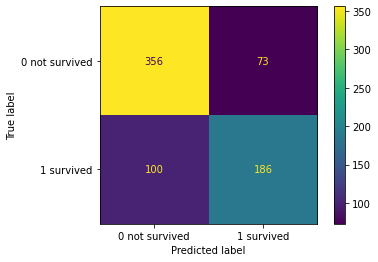

In [ ]:
# Training confusion matrix
plot_confusion_matrix(model,scaled_x_train,scaled_y_train,display_labels=["0 not survived","1 survived"])

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


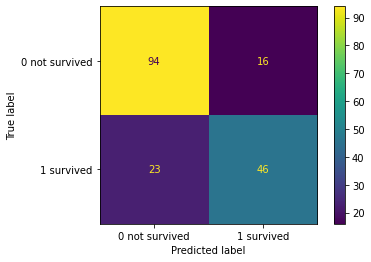

In [ ]:
# Testing confusion matrix
plot_confusion_matrix(model,scaled_x_test,scaled_y_test,display_labels=["0 not survived","1 survived"])

# 7. Hyper parameter tuning

At this point, you should understand the basic functions that you will need when modeling. In real case scenario, this section provides the basic modeling scheme and combines what you have learned in section 6.   

In [ ]:
# 7.1 Split the data (split into 80% training data & 20% testing data) (lock seed)
scaled_x_train,scaled_x_test,scaled_y_train,scaled_y_test=train_test_split(scaled_x,scaled_y,test_size=0.2,random_state=4)

# 7.2 Manually peforming hyper parameter tuning
model_LinearSVM=LinearSVC(C=10000,dual=False,random_state=4)
model_LinearSVM.fit(scaled_x_train,scaled_y_train)
CV3F_LinearSVM_acc=cross_val_score(model_LinearSVM,scaled_x_train,scaled_y_train,cv=3,scoring='accuracy')

#print reault
print('Training result')
print('Each fold ACC:',CV3F_LinearSVM_acc)
print('Average ACC:',round((np.mean(CV3F_LinearSVM_acc))*100,2),'+/-',round((np.std(CV3F_LinearSVM_acc))*100,2))

Training result
Each fold ACC: [0.76987448 0.77731092 0.69327731]
Average ACC: 74.68 +/- 3.8


Note: After finding the best value of C, you should use the scaled testing data set to evaluate the final model.

Testing ACC: 78.21
Testing f1s: 70.23
Testing pre: 74.19
Testing sen: 66.67
Testing spe: 85.45


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


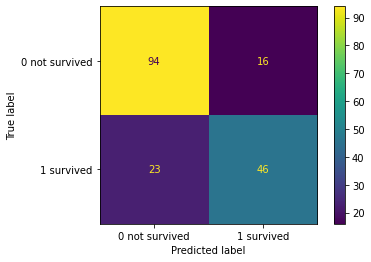

In [ ]:
# 7.3 Evaluate with testing data set
final_model_testing_prediction=model_LinearSVM.predict(scaled_x_test)
final_model_testing_acc=accuracy_score(scaled_y_test,final_model_testing_prediction)
final_model_testing_f1s=f1_score(scaled_y_test,final_model_testing_prediction,pos_label=1)
final_model_testing_pre=precision_score(scaled_y_test,final_model_testing_prediction,pos_label=1)
final_model_testing_sen=sensitivity_score(scaled_y_test,final_model_testing_prediction,pos_label=1)
final_model_testing_spe=specificity_score(scaled_y_test,final_model_testing_prediction,pos_label=1)

#print result
print('Testing ACC:',round(final_model_testing_acc*100,2))
print('Testing f1s:',round(final_model_testing_f1s*100,2))
print('Testing pre:',round(final_model_testing_pre*100,2))
print('Testing sen:',round(final_model_testing_sen*100,2))
print('Testing spe:',round(final_model_testing_spe*100,2))
plot_confusion_matrix(model_LinearSVM,scaled_x_test,scaled_y_test,display_labels=["0 not survived","1 survived"])

In [ ]:
# Get the weights for forming the hyperplane equation
print('Coefficient')
print(model_LinearSVM.coef_[0])
print('==========================================================================')
print('Intercept')
print(model_LinearSVM.intercept_)

Coefficient
[-0.63200843 -0.52259189  0.17641301  0.49390659  0.29425779  0.06521805
 -0.23250799  0.46504176 -0.3380739  -0.03392155  0.19231493 -0.03142553]
Intercept
[0.12696785]


In [ ]:
# Demo
testing_distance_to_hyperplane=model_LinearSVM.decision_function(scaled_x_test)
testing_distance_to_hyperplane

array([-0.69641626,  0.65212404, -0.33206286, -0.73290577,  0.17596568,
       -0.86113937, -0.2305728 , -0.51323402, -0.7263909 , -0.29821973,
       -0.16157547,  0.39956006,  0.03010172,  0.48599544, -0.26524152,
        0.2994316 , -0.23267163, -0.28659713,  0.39777646,  0.02779174,
        0.38063481, -0.79919953, -0.15701863,  0.67260472, -0.41326497,
       -0.78801168, -0.76766771,  0.23579682, -0.55314661, -0.7045211 ,
       -0.71318883,  0.22826978, -0.75982462,  0.30346433, -0.64270936,
        0.09756801,  0.37231752, -0.2530916 , -0.28284327, -1.03685704,
       -0.6601396 , -0.42365828, -0.88515109, -0.73305443, -0.2904131 ,
        0.45031223, -0.62275025, -0.06747246, -0.36260074,  0.06086158,
       -0.80633077, -0.44782784, -0.18883544, -0.72393499,  0.29461709,
        0.10676255, -0.65124112,  0.76040614, -0.83461006, -0.3193505 ,
        0.04202365, -0.92374395, -0.65962943,  0.43509195,  0.20431168,
       -0.43316051,  0.29399961, -0.1729338 , -0.65987449, -0.77

In [ ]:
# Demo
final_model_testing_prediction

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1])

# Addition tips: SVM with radio base function kernel

Sklearn also provides a function for SVM that user can easily select the kernel function, the following example demonstrates fitting the SVM with the radio base function

In [ ]:
from sklearn.svm import SVC
# Split the data (split into 80% training data & 20% testing data) (lock seed)
scaled_x_train,scaled_x_test,scaled_y_train,scaled_y_test=train_test_split(scaled_x,scaled_y,test_size=0.2,random_state=1000)

# Manually peforming hyper parameter tuning gamma in the range of 0 to 1
model_RBF_SVM=SVC(kernel='rbf',gamma=0.5,C=1000,random_state=4)
model_RBF_SVM.fit(scaled_x_test,scaled_y_test)
CV3F_SVM_acc=cross_val_score(model_RBF_SVM,scaled_x_test,scaled_y_test,cv=3,scoring='accuracy')

#print reault
print('Test result')
print('Each fold ACC:',CV3F_SVM_acc)
print('Average ACC:',round((np.mean(CV3F_SVM_acc))*100,2),'+/-',round((np.std(CV3F_SVM_acc))*100,2))

Test result
Each fold ACC: [0.83333333 0.76666667 0.77966102]
Average ACC: 79.32 +/- 2.89


Scoring:
ACC: 88.83
f1s: 87.01
pre: 85.9
sen: 88.16
spe: 89.32


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


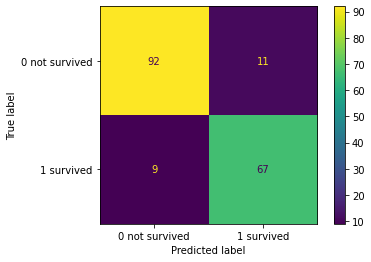

In [ ]:
# Evaluate with testing data set
RBF_SVM_testing_prediction=model_RBF_SVM.predict(scaled_x_test)
RBF_SVM_testing_acc=accuracy_score(scaled_y_test,RBF_SVM_testing_prediction)
RBF_SVM_testing_f1s=f1_score(scaled_y_test,RBF_SVM_testing_prediction,pos_label=1)
RBF_SVM_testing_pre=precision_score(scaled_y_test,RBF_SVM_testing_prediction,pos_label=1)
RBF_SVM_testing_sen=sensitivity_score(scaled_y_test,RBF_SVM_testing_prediction,pos_label=1)
RBF_SVM_testing_spe=specificity_score(scaled_y_test,RBF_SVM_testing_prediction,pos_label=1)

#print result
print('Scoring:')
print('ACC:',round(RBF_SVM_testing_acc*100,2))
print('f1s:',round(RBF_SVM_testing_f1s*100,2))
print('pre:',round(RBF_SVM_testing_pre*100,2))
print('sen:',round(RBF_SVM_testing_sen*100,2))
print('spe:',round(RBF_SVM_testing_spe*100,2))
plot_confusion_matrix(model_RBF_SVM,scaled_x_test,scaled_y_test,display_labels=["0 not survived","1 survived"])

# Addition tips: SVM with polynomial kernel

Sklearn also provides a function for SVM that user can easily select the kernel function, the following example demonstrates fitting the SVM with the polynomial kernel

In [ ]:
from sklearn.svm import SVC
# Split the data (split into 80% training data & 20% testing data) (lock seed)
scaled_x_train,scaled_x_test,scaled_y_train,scaled_y_test=train_test_split(scaled_x,scaled_y,test_size=0.2,random_state=4)

# Manually peforming hyper parameter tuning gamma in the range of 0 to 1
model_poly_SVM=SVC(kernel='poly',gamma=0.5,C=100,degree=4,random_state=4)
model_poly_SVM.fit(scaled_x_train,scaled_y_train)
CV5F_SVM_acc=cross_val_score(model_poly_SVM,scaled_x_train,scaled_y_train,cv=5,scoring='accuracy')

#print reault
print('Training result')
print('Each fold ACC:',CV5F_SVM_acc)
print('Average ACC:',round((np.mean(CV5F_SVM_acc))*100,2),'+/-',round((np.std(CV5F_SVM_acc))*100,2))

Training result
Each fold ACC: [0.71875 0.8     0.7625  0.7375  0.76875]
Average ACC: 75.75 +/- 2.78


Testing ACC: 73.63
Testing f1s: 65.36
Testing pre: 67.57
Testing sen: 63.29
Testing spe: 80.33


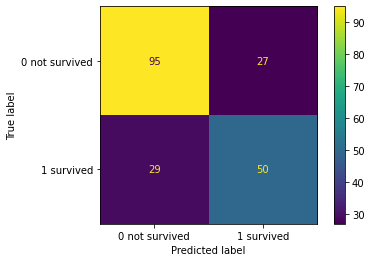

In [ ]:
# Evaluate with testing data set
POLY_SVM_testing_prediction=model_poly_SVM.predict(scaled_x_test)
POLY_SVM_testing_acc=accuracy_score(scaled_y_test,RBF_SVM_testing_prediction)
POLY_SVM_testing_f1s=f1_score(scaled_y_test,RBF_SVM_testing_prediction,pos_label=1)
POLY_SVM_testing_pre=precision_score(scaled_y_test,RBF_SVM_testing_prediction,pos_label=1)
POLY_SVM_testing_sen=sensitivity_score(scaled_y_test,RBF_SVM_testing_prediction,pos_label=1)
POLY_SVM_testing_spe=specificity_score(scaled_y_test,RBF_SVM_testing_prediction,pos_label=1)

#print result
print('Testing ACC:',round(POLY_SVM_testing_acc*100,2))
print('Testing f1s:',round(POLY_SVM_testing_f1s*100,2))
print('Testing pre:',round(POLY_SVM_testing_pre*100,2))
print('Testing sen:',round(POLY_SVM_testing_sen*100,2))
print('Testing spe:',round(POLY_SVM_testing_spe*100,2))
plot_confusion_matrix(model_poly_SVM,scaled_x_test,scaled_y_test,display_labels=["0 not survived","1 survived"])